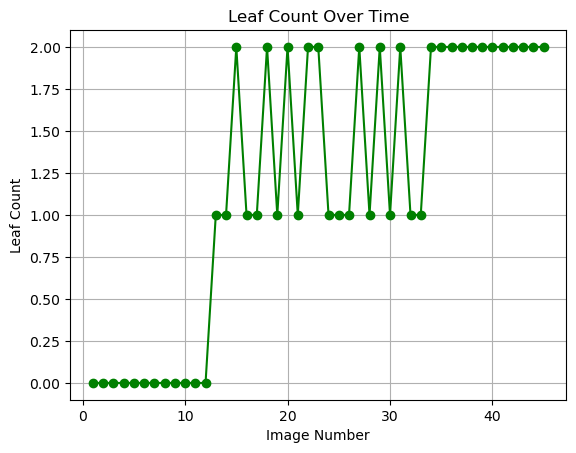

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Create an output directory if it doesn't exist
output_dir = "leaf"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a text file to write leaf counts
leaf_count_file = open("leaf_counts3.txt", "w")

# Directory with input images
input_dir = "INPUT1"

# List to store leaf counts for graphing
leaf_counts = []

# Iterate over all files in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image (you can add more file types if needed)
    if filename.lower().endswith((".jpg", ".png", ".heic")):
        image_path = os.path.join(input_dir, filename)

        # Load image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image {image_path}")
            continue  # Skip this iteration if image cannot be loaded

        # Convert to HSV (Hue, Saturation, Value) color space
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define the range of green color in HSV space
        lower_green = np.array([35, 40, 40])  # You can adjust these values based on your image
        upper_green = np.array([85, 255, 255])

        # Create a mask that isolates the green regions (leaves)
        mask = cv2.inRange(hsv, lower_green, upper_green)

        # Perform erosion to remove noise (shrink the white regions)
        kernel = np.ones((5, 5), np.uint8)
        eroded_mask = cv2.erode(mask, kernel, iterations=1)

        # Perform morphological operations to remove gaps and small noise (optional)
        mask_cleaned = cv2.morphologyEx(eroded_mask, cv2.MORPH_CLOSE, kernel)

        # Find contours on the cleaned mask
        contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Filter contours based on area (ignore small noise)
        min_leaf_area = 75  # Minimum size to be considered a leaf
        leaf_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_leaf_area]

        # Draw contours on the original image
        output = image.copy()
        cv2.drawContours(output, leaf_contours, -1, (0, 255, 0), 2)

        # Count leaves
        leaf_count = len(leaf_contours)

        # Write the leaf count to the text file
        leaf_count_file.write(f"{filename}: {leaf_count} leaves\n")

        # Save the output image with contours
        output_image_path = os.path.join(output_dir, f"contours_{filename}")
        cv2.imwrite(output_image_path, output)

        # Add the leaf count to the list for graphing
        leaf_counts.append(leaf_count)

# Close the text file after writing the results
leaf_count_file.close()

# Create the leaf count plot
plt.plot(range(1, len(leaf_counts) + 1), leaf_counts, marker='o', linestyle='-', color='green')
plt.title("Leaf Count Over Time")
plt.xlabel("Image Number")
plt.ylabel("Leaf Count")
plt.grid()
plt.show()

# Destroy all OpenCV windows
cv2.destroyAllWindows()
